# Classification sur l'dentification de l'espèce

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving new_plant.csv to new_plant.csv


In [ ]:
import pandas as pd
import numpy as np

new_plant = pd.read_csv('new_plant.csv')

new_plant.head()

,Chemin,Espèce,Nom de la maladie,Statut
0,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
1,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
2,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
3,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True
4,/content/drive/MyDrive/Dataset_projet/Maladie ...,Cherry,Powdery_mildew,True


In [ ]:
new_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70358 entries, 0 to 70357
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chemin             70358 non-null  object
 1   Espèce             70358 non-null  object
 2   Nom de la maladie  48062 non-null  object
 3   Statut             70358 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 1.7+ MB


In [ ]:
print("Nom des espèces :", list(new_plant['Espèce'].unique()))

Nom des espèces : ['Cherry', 'Corn_(maize)', 'Blueberry', 'Apple', 'Grape', 'Potato', 'Peach', 'Pepper,_bell', 'Orange', 'Squash', 'Soybean', 'Tomato', 'Strawberry', 'Raspberry']


In [ ]:
print("Nombre d'espèces :", len(new_plant['Espèce'].unique()))

Nombre d'espèces : 14


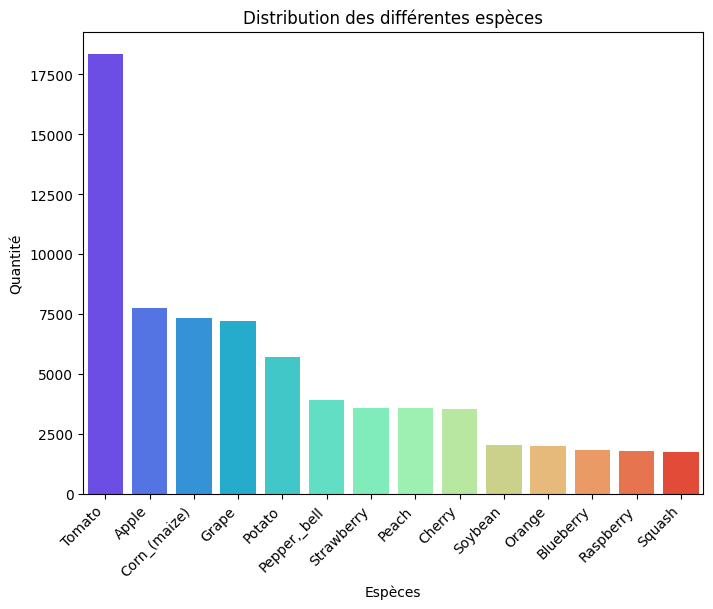

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sorted_species = new_plant['Espèce'].value_counts()

ax = sns.countplot(data=new_plant, x='Espèce',order=sorted_species.index, palette='rainbow')
plt.title("Distribution des différentes espèces")
plt.xlabel("Espèces")
plt.ylabel("Quantité")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [ ]:
# Chemin du dossier contenant les images
image_path = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train"


# Modèle RandomForest

In [ ]:
import pandas as pd
import numpy as np
import cv2


from sklearn.ensemble import RandomForestClassifier

new_plant = pd.read_csv('new_plant.csv')

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Préparation des données d'entraînement et des étiquettes
X = []
y = []


for img_path, label in zip(new_plant['Chemin'], new_plant['Espèce']):
    img = cv2.imread(img_path)
    features = extract_features(img)   # Calculer l'histogramme
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)



In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Entraînement du modèle
rf.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf.score(X_test, y_test)
print("Précision:", accuracy)

Accuracy: 0.9719300739056282


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       Apple       0.97      0.98      0.98      1546
   Blueberry       0.97      0.96      0.97       363
      Cherry       0.98      0.96      0.97       718
Corn_(maize)       0.99      1.00      0.99      1443
       Grape       0.98      0.99      0.99      1456
      Orange       1.00      0.90      0.94       411
       Peach       0.99      0.91      0.95       730
Pepper,_bell       0.97      0.92      0.94       797
      Potato       0.98      0.97      0.98      1117
   Raspberry       0.95      0.98      0.97       322
     Soybean       0.97      0.92      0.94       414
      Squash       1.00      0.96      0.98       356
  Strawberry       0.99      0.99      0.99       676
      Tomato       0.95      0.99      0.97      3723

    accuracy                           0.97     14072
   macro avg       0.98      0.96      0.97     14072
weighted avg       0.97      0.97      0.97     14072



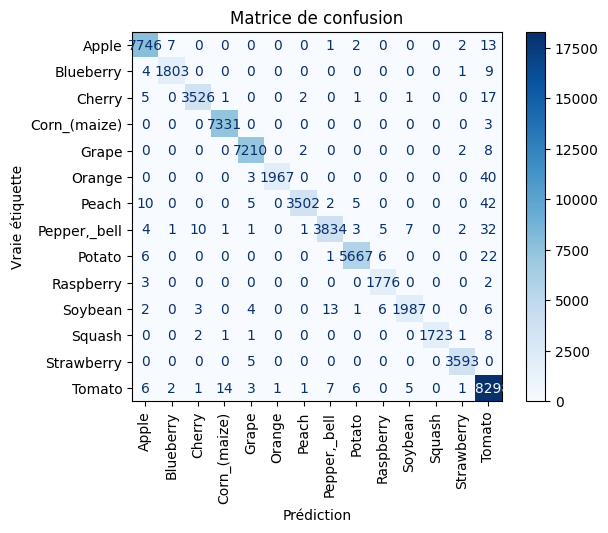

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X)

cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

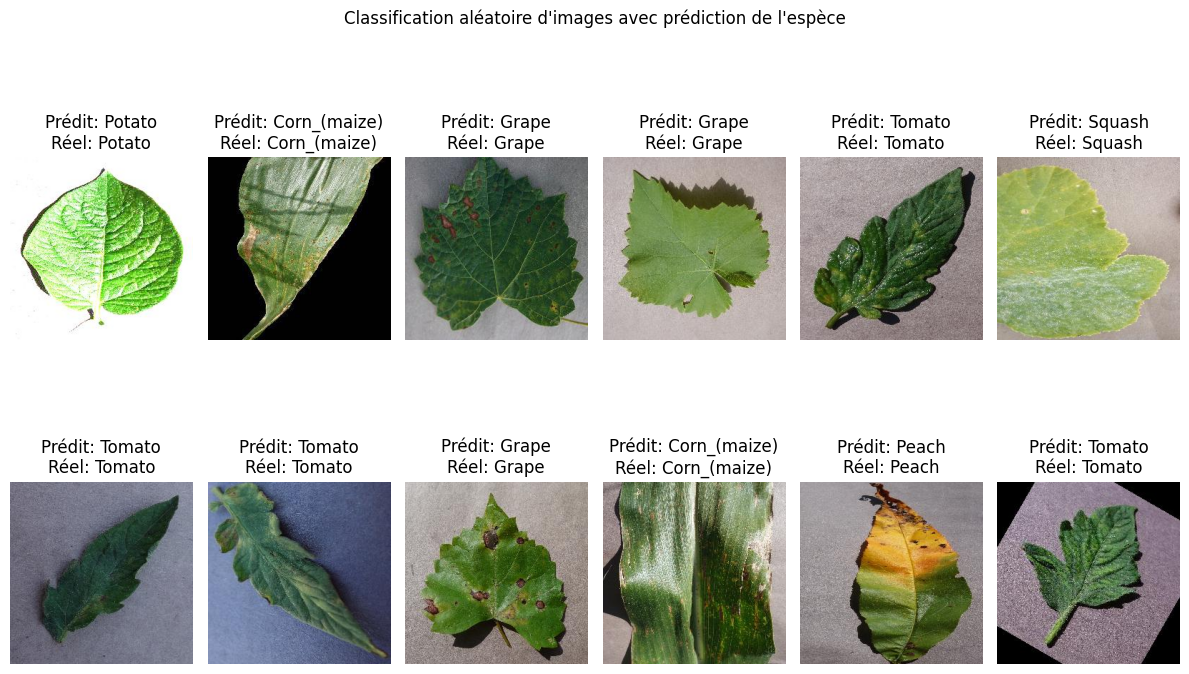

In [ ]:
import random

random_indices = random.sample(range(len(new_plant)), 12)

fig, axes = plt.subplots(2, 6, figsize=(12, 8))
fig.suptitle('Classification aléatoire d\'images avec prédiction de l\'espèce')

for i, idx in enumerate(random_indices):
    img_path = new_plant['Chemin'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = rf.predict([img_features])[0]

    true_label = new_plant['Espèce'][idx]

    row = i // 6
    col = i % 6
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Rééchantillonnage de 30% du DataFrame initial

In [ ]:
new_plant_bis = new_plant.sample(frac=0.3, replace=False, random_state=42)

display(new_plant_bis)

,Chemin,Espèce,Nom de la maladie,Statut
65017,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Yellow_Leaf_Curl_Virus,True
18057,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),NaN,False
31141,/content/drive/MyDrive/Dataset_projet/Maladie ...,Potato,NaN,False
37936,/content/drive/MyDrive/Dataset_projet/Maladie ...,Orange,Haunglongbing_(Citrus_greening),True
39633,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Leaf_blight_(Isariopsis_Leaf_Spot),True
...,...,...,...,...
6888,/content/drive/MyDrive/Dataset_projet/Maladie ...,Blueberry,NaN,False
54124,/content/drive/MyDrive/Dataset_projet/Maladie ...,Raspberry,NaN,False
59929,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Leaf_Mold,True
13516,/content/drive/MyDrive/Dataset_projet/Maladie ...,Corn_(maize),Common_rust_,True


In [ ]:
new_plant_bis = new_plant_bis.dropna()


In [ ]:
new_plant_bis.head()

,Chemin,Espèce,Nom de la maladie,Statut
65017,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Yellow_Leaf_Curl_Virus,True
37936,/content/drive/MyDrive/Dataset_projet/Maladie ...,Orange,Haunglongbing_(Citrus_greening),True
39633,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Leaf_blight_(Isariopsis_Leaf_Spot),True
23292,/content/drive/MyDrive/Dataset_projet/Maladie ...,Grape,Esca_(Black_Measles),True
48377,/content/drive/MyDrive/Dataset_projet/Maladie ...,Tomato,Early_blight,True


In [ ]:
new_plant_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21107 entries, 65017 to 3813
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chemin             21107 non-null  object
 1   Espèce             21107 non-null  object
 2   Nom de la maladie  14433 non-null  object
 3   Statut             21107 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 680.2+ KB


In [ ]:
print("Nom des espèces :", list(new_plant['Espèce'].unique()))

Nom des espèces : ['Cherry', 'Corn_(maize)', 'Blueberry', 'Apple', 'Grape', 'Potato', 'Peach', 'Pepper,_bell', 'Orange', 'Squash', 'Soybean', 'Tomato', 'Strawberry', 'Raspberry']


In [ ]:
print("Nombre d'espèces :", len(new_plant['Espèce'].unique()))

Nombre d'espèces : 14


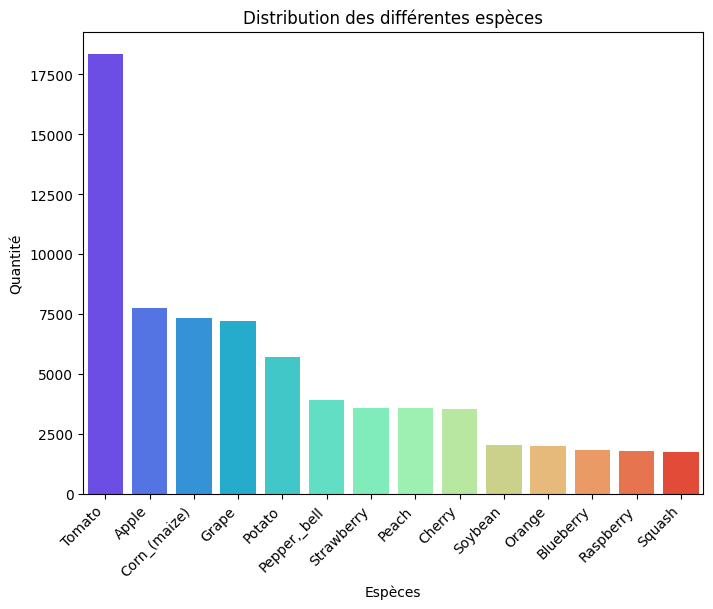

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sorted_species = new_plant['Espèce'].value_counts()

ax = sns.countplot(data=new_plant, x='Espèce',order=sorted_species.index, palette='rainbow')
plt.title("Distribution des différentes espèces")
plt.xlabel("Espèces")
plt.ylabel("Quantité")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [ ]:
taille_classes = new_plant_bis['Espèce'].value_counts()

print(taille_classes)

Tomato          5487
Apple           2323
Grape           2215
Corn_(maize)    2181
Potato          1745
Pepper,_bell    1204
Peach           1077
Cherry          1045
Strawberry      1011
Orange           624
Soybean          608
Blueberry        533
Raspberry        527
Squash           527
Name: Espèce, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import cv2


from sklearn.ensemble import RandomForestClassifier


def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Préparation des données d'entraînement et des étiquettes
X = []
y = []


for img_path, label in zip(new_plant_bis['Chemin'], new_plant_bis['Espèce']):
    img = cv2.imread(img_path)
    features = extract_features(img)   # Calculer l'histogramme
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)

## Rééchantillonnage : undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Créer une instance de la méthode RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Appliquer l'undersampling sur les ensembles d'entraînement
X_ru, y_ru = undersampler.fit_resample(X_train, y_train)


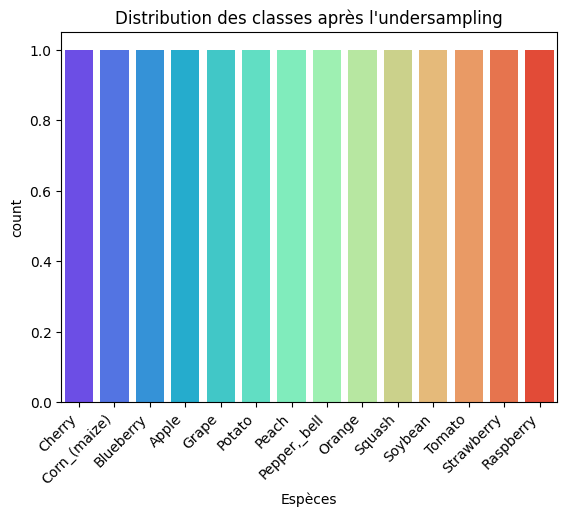

In [ ]:
import numpy as np

unique_labels, label_counts = np.unique(y_ru, return_counts=True)

labels = ['Cherry', 'Corn_(maize)', 'Blueberry', 'Apple', 'Grape', 'Potato', 'Peach', 'Pepper,_bell', 'Orange', 'Squash', 'Soybean', 'Tomato', 'Strawberry', 'Raspberry']


ax = sns.countplot(x=labels, palette='rainbow')
plt.xlabel('Espèces')

plt.title('Distribution des classes après l\'undersampling')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

### Modèle SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm_classifier = SVC()

param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Recherche des meilleurs paramètres
grid_search.fit(X_ru, y_ru)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Créer une nouvelle instance du classificateur SVM avec les meilleurs paramètres
svm_classifier_best = SVC(**best_params)

# Entraîner le modèle sur les données d'entraînement équilibrées
svm_classifier_best.fit(X_ru, y_ru)

y_pred = svm_classifier_best.predict(X_test)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM : {:.2f}%".format(accuracy * 100))

Meilleurs paramètres : {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Précision du modèle SVM : 82.52%


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       Apple       0.74      0.73      0.74       450
   Blueberry       0.53      0.96      0.68        91
      Cherry       0.70      0.90      0.78       210
Corn_(maize)       0.95      0.95      0.95       484
       Grape       0.91      0.86      0.88       447
      Orange       0.79      0.95      0.86       131
       Peach       0.75      0.83      0.79       223
Pepper,_bell       0.77      0.78      0.77       241
      Potato       0.83      0.87      0.85       349
   Raspberry       0.73      0.98      0.84       112
     Soybean       0.71      0.91      0.80        99
      Squash       0.82      0.95      0.88       103
  Strawberry       0.83      0.97      0.89       181
      Tomato       0.93      0.70      0.80      1101

    accuracy                           0.83      4222
   macro avg       0.79      0.88      0.82      4222
weighted avg       0.84      0.83      0.83      4222



### Modèle RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Créer une instance de RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Entraîner le modèle avec les données rééquilibrées
rf.fit(X_ru, y_ru)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle RandomForest : {:.2f}%".format(accuracy * 100))

Précision du modèle RandomForest : 84.53%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       Apple       0.81      0.82      0.82       450
   Blueberry       0.60      0.98      0.74        91
      Cherry       0.79      0.92      0.85       210
Corn_(maize)       0.93      0.99      0.96       484
       Grape       0.89      0.88      0.88       447
      Orange       0.68      0.96      0.80       131
       Peach       0.86      0.87      0.86       223
Pepper,_bell       0.81      0.76      0.79       241
      Potato       0.81      0.88      0.84       349
   Raspberry       0.75      0.99      0.85       112
     Soybean       0.68      0.98      0.80        99
      Squash       0.80      0.98      0.88       103
  Strawberry       0.88      0.96      0.92       181
      Tomato       0.96      0.68      0.80      1101

    accuracy                           0.85      4222
   macro avg       0.80      0.90      0.84      4222
weighted avg       0.86      0.85      0.84      4222



## Rééchantillonnage : Oversampling

*SMOTE sur modèle SVM*

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Rééchantillonnage des données avec SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))



{'Apple': 5487, 'Blueberry': 5487, 'Cherry': 5487, 'Corn_(maize)': 5487, 'Grape': 5487, 'Orange': 5487, 'Peach': 5487, 'Pepper,_bell': 5487, 'Potato': 5487, 'Raspberry': 5487, 'Soybean': 5487, 'Squash': 5487, 'Strawberry': 5487, 'Tomato': 5487}


In [ ]:
svm = SVC(C= 10, gamma= 1, kernel= 'rbf')

# Entraîner le modèle sur les données d'entraînement équilibrées
svm.fit(X_resampled, y_resampled)

y_pred = svm.predict(X_test)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM : {:.2f}%".format(accuracy * 100))

Précision du modèle SVM : 97.96%


In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Apple       0.98      0.97      0.98       450
   Blueberry       0.89      0.98      0.93        91
      Cherry       0.98      1.00      0.99       210
Corn_(maize)       1.00      1.00      1.00       484
       Grape       1.00      0.98      0.99       447
      Orange       0.98      1.00      0.99       131
       Peach       0.97      0.99      0.98       223
Pepper,_bell       0.98      0.97      0.97       241
      Potato       0.97      0.98      0.98       349
   Raspberry       0.90      0.99      0.94       112
     Soybean       0.96      0.99      0.98        99
      Squash       1.00      1.00      1.00       103
  Strawberry       0.97      1.00      0.99       181
      Tomato       0.99      0.96      0.97      1101

    accuracy                           0.98      4222
   macro avg       0.97      0.99      0.98      4222
weighted avg       0.98      0.98      0.98      4222



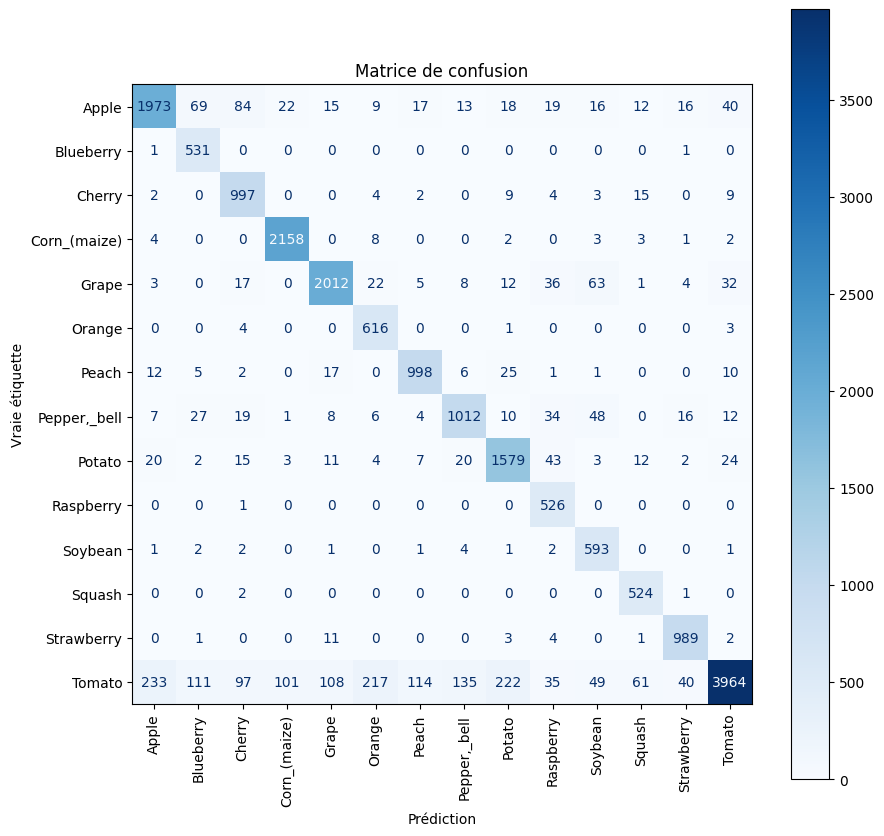

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

*SMOTE sur modèle RandomForest*

In [ ]:
# Génération de nouvelles données avec SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Rééchantillonnage des données avec SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Affichage des tailles des classes équilibrées
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{'Apple': 5487, 'Blueberry': 5487, 'Cherry': 5487, 'Corn_(maize)': 5487, 'Grape': 5487, 'Orange': 5487, 'Peach': 5487, 'Pepper,_bell': 5487, 'Potato': 5487, 'Raspberry': 5487, 'Soybean': 5487, 'Squash': 5487, 'Strawberry': 5487, 'Tomato': 5487}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur les données équilibrées
rf.fit(X_resampled, y_resampled)

# Évaluation
accuracy = rf.score(X_test, y_test)
print("Précision:", accuracy)

Précision: 1.0


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       450
   Blueberry       1.00      1.00      1.00        91
      Cherry       1.00      1.00      1.00       210
Corn_(maize)       1.00      1.00      1.00       484
       Grape       1.00      1.00      1.00       447
      Orange       1.00      1.00      1.00       131
       Peach       1.00      1.00      1.00       223
Pepper,_bell       1.00      1.00      1.00       241
      Potato       1.00      1.00      1.00       349
   Raspberry       1.00      1.00      1.00       112
     Soybean       1.00      1.00      1.00        99
      Squash       1.00      1.00      1.00       103
  Strawberry       1.00      1.00      1.00       181
      Tomato       1.00      1.00      1.00      1101

    accuracy                           1.00      4222
   macro avg       1.00      1.00      1.00      4222
weighted avg       1.00      1.00      1.00      4222



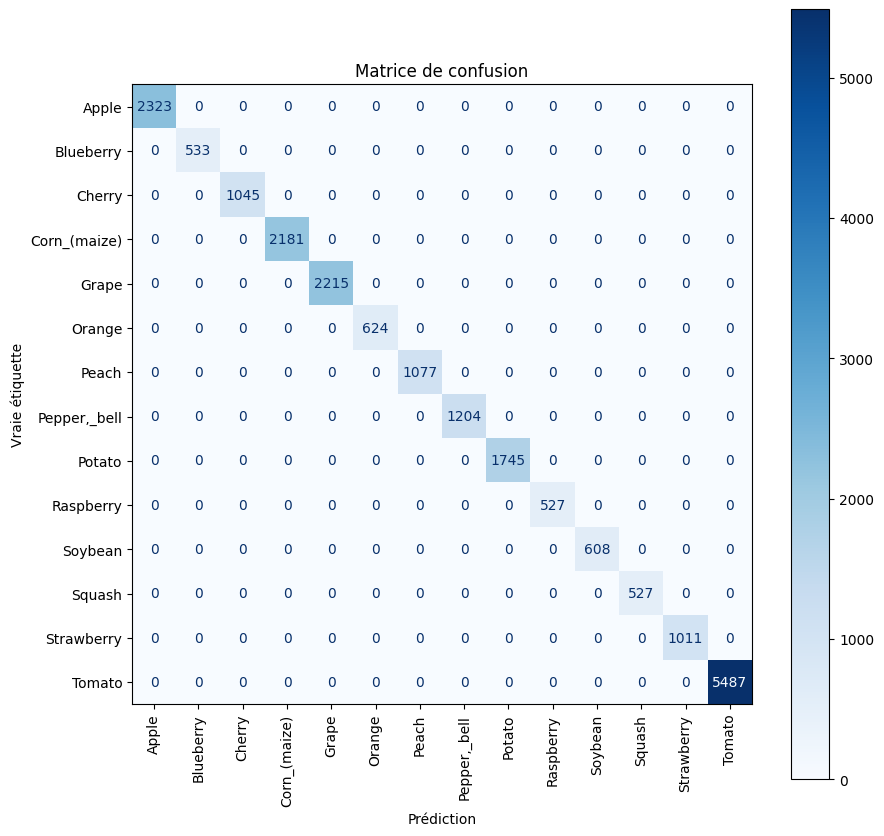

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)

fig, ax = plt.subplots(figsize=(10, 10))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

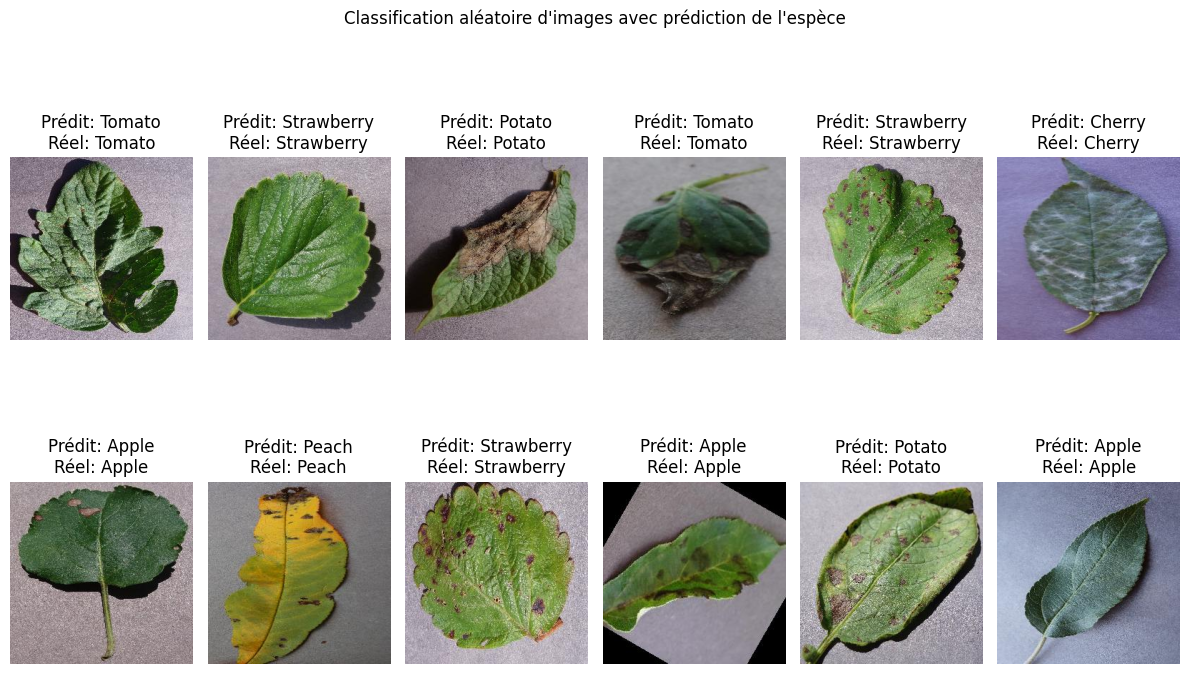

In [ ]:
import random

random_indices = random.sample(range(len(new_plant)), 12)

fig, axes = plt.subplots(2, 6, figsize=(12, 8))
fig.suptitle('Classification aléatoire d\'images avec prédiction de l\'espèce')

for i, idx in enumerate(random_indices):
    img_path = new_plant['Chemin'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = rf.predict([img_features])[0]

    true_label = new_plant['Espèce'][idx]

    row = i // 6
    col = i % 6
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()